[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



--- Train Data Sample ---
|    | category                              | sub_category                      | crimeaditionalinfo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|---:|:--------------------------------------|:----------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<ipython-input-7-a1b81089ec71>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


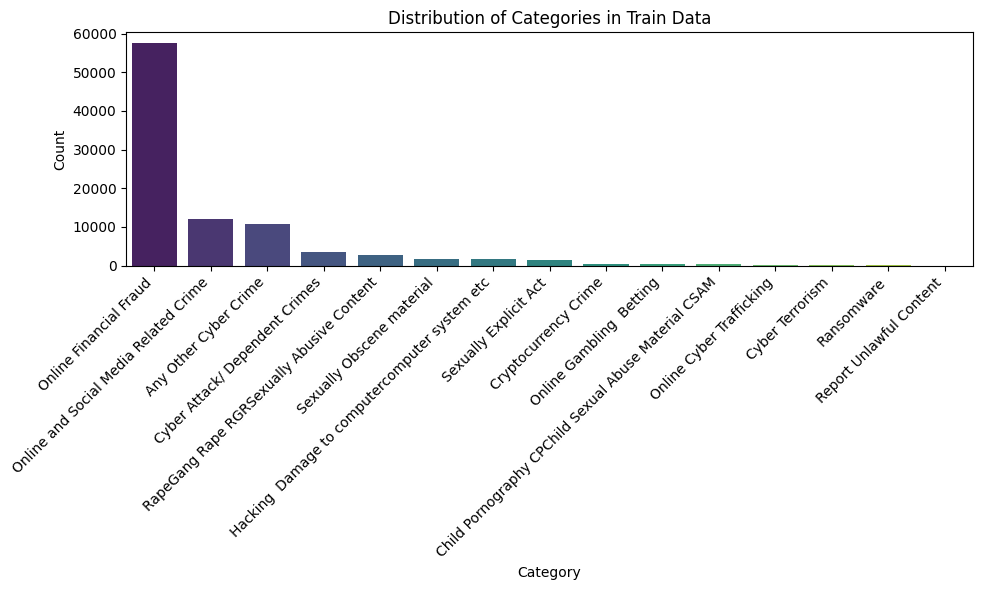

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Evaluation Metrics:

Accuracy: 0.74
Precision: 0.72
Recall: 0.74
F1-Score: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                                                       precision    recall  f1-score   support

                               Any Other Cyber Crime       0.36      0.28      0.32      2091
Child Pornography CPChild Sexual Abuse Material CSAM       0.93      0.19      0.31        69
                                Cryptocurrency Crime       1.00      0.03      0.06        96
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       765
                                     Cyber Terrorism       0.00      0.00      0.00        31
      Hacking  Damage to computercomputer system etc       0.36      0.11      0.17       341
                            Online Cyber Trafficking       0.00      0.00      0.00        34
                              Online Financial Fraud       0.83      0.91      0.87     11471
                            Online Gambling  Betting       0.00      0.00      0.00        97
               Online and Social M

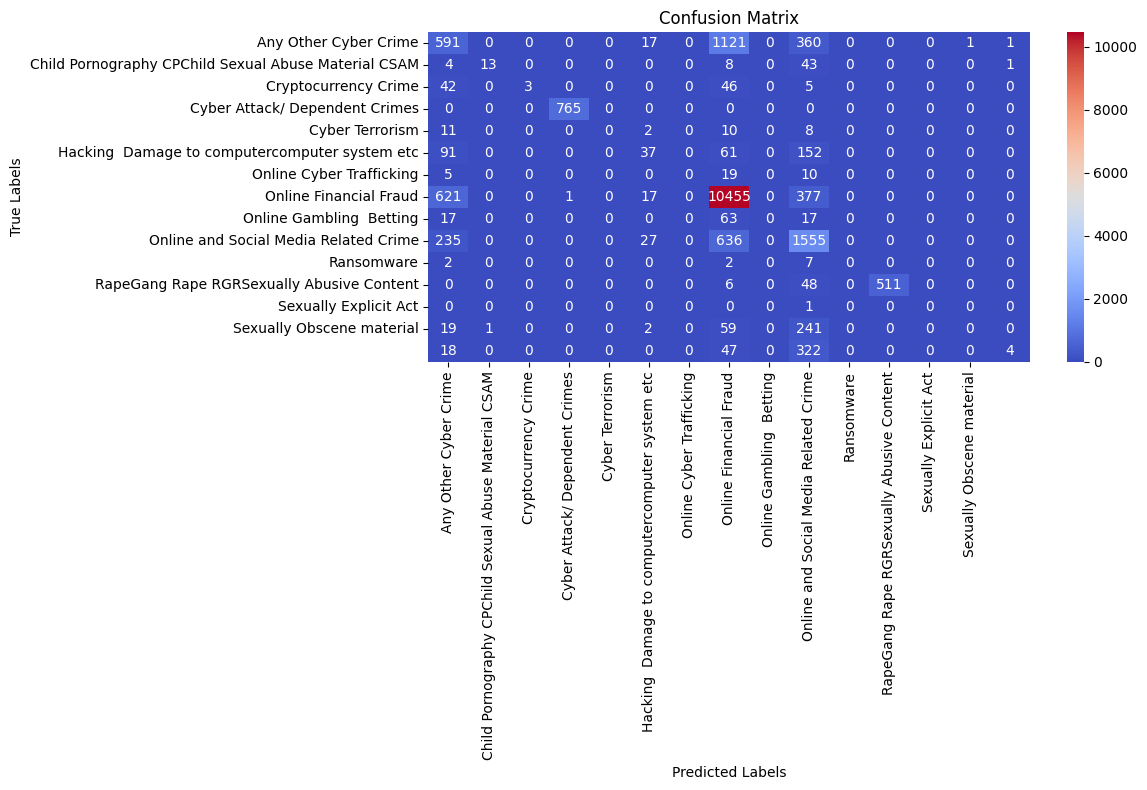


Predictions saved to 'predictions.csv'.

Test Input: 'I sent them money on their bank account'
Predicted Category: Online Financial Fraud
Confidence Score: 0.90


In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

# Step 2: Load and Inspect Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display data heads in a presentable manner
print("\n--- Train Data Sample ---")
print(train_data.head().to_markdown())

print("\n--- Test Data Sample ---")
print(test_data.head().to_markdown())

# Step 3: Preprocess the Text Data
def clean_text(text):
    """Remove special characters, digits, and extra spaces from text."""
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Clean, tokenize, remove stop words, and stem text."""
    if isinstance(text, float):
        text = ''
    text = clean_text(str(text))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

# Apply preprocessing
train_data['processed_text'] = train_data['crimeaditionalinfo'].astype(str).apply(preprocess_text)
test_data['processed_text'] = test_data['crimeaditionalinfo'].astype(str).apply(preprocess_text)

# Step 4: Analyze and Visualize Dataset
# Distribution of Categories
category_counts = train_data['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Categories in Train Data")
plt.ylabel("Count")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# Step 5: Convert Text to Numerical Form
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_data['processed_text'])
y = train_data['category']

# Step 6: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Development
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 8: Evaluate the Model
y_pred = model.predict(X_val)

# Metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"\nModel Evaluation Metrics:\n")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# Step 9: Predict on Test Data
X_test = vectorizer.transform(test_data['processed_text'])
test_predictions = model.predict(X_test)

# Confidence scores for predictions
test_prediction_probs = model.predict_proba(X_test)
test_data['Predicted_Category'] = test_predictions
test_data['Confidence_Score'] = test_prediction_probs.max(axis=1)

# Save predictions
test_data['ID'] = test_data.index
submission = test_data[['ID', 'Predicted_Category', 'Confidence_Score']]
submission.to_csv('predictions.csv', index=False)
print("\nPredictions saved to 'predictions.csv'.")

# Step 10: Predict New Input
def predict_new_text(input_text):
    """Predict categories and confidence score for a new input."""
    processed_text = preprocess_text(input_text)
    transformed_text = vectorizer.transform([processed_text])
    predictions = model.predict(transformed_text)
    confidence_scores = model.predict_proba(transformed_text).max(axis=1)
    return predictions[0], confidence_scores[0]




In [ ]:
# Test new input
test_input = "Gambling problem asking money "
predicted_category, confidence = predict_new_text(test_input)
print(f"\nTest Input: '{test_input}'")
print(f"Predicted Category: {predicted_category}")
print(f"Confidence Score: {confidence:.2f}")



Test Input: 'Gambling problem asking money '
Predicted Category: Online Financial Fraud
Confidence Score: 0.34
